# KNN: Telecommunications Customer Classification

Optimized KNN model for high accuracy customer category prediction with minimal code.

In [33]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Loading and Preparation

In [34]:
# Load data
df = pd.read_csv('teleCust.csv')
print(f"Dataset: {df.shape[0]} customers, {df.shape[1]} features")
print(f"Categories: {sorted(df['custcat'].unique())}")
print(f"Distribution:\n{df['custcat'].value_counts().sort_index()}")

# Prepare features and target
features = ['region', 'tenure', 'age', 'marital', 'address', 'income', 
           'ed', 'employ', 'retire', 'gender', 'reside']
X = df[features]
y = df['custcat']

# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTrain: {len(X_train)} | Test: {len(X_test)}")

Dataset: 1000 customers, 12 features
Categories: [np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
Distribution:
custcat
1    266
2    217
3    281
4    236
Name: count, dtype: int64

Train: 800 | Test: 200


## Optimal K Selection

Optimal K: 6
Best Accuracy: 0.4000 (40.0%)


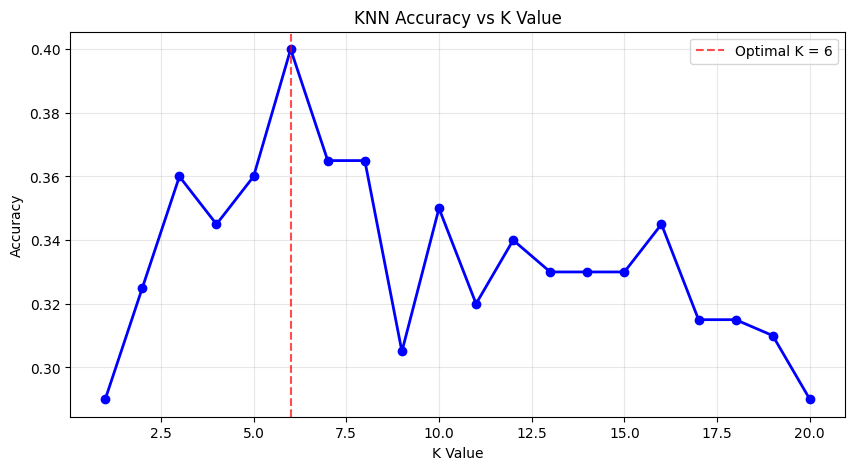

In [35]:
# Test K values efficiently
k_range = range(1, 21)
accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    pred = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, pred))

# Find optimal K
optimal_k = k_range[np.argmax(accuracies)]
best_accuracy = max(accuracies)

print(f"Optimal K: {optimal_k}")
print(f"Best Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.1f}%)")

# Visualize K performance
plt.figure(figsize=(10, 5))
plt.plot(k_range, accuracies, 'bo-', linewidth=2, markersize=6)
plt.axvline(x=optimal_k, color='red', linestyle='--', alpha=0.7, label=f'Optimal K = {optimal_k}')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs K Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Final Model Training and Evaluation

In [36]:
# Train final model
final_knn = KNeighborsClassifier(n_neighbors=optimal_k)
final_knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = final_knn.predict(X_test_scaled)
final_accuracy = accuracy_score(y_test, y_pred)

print("=" * 50)
print("FINAL KNN MODEL RESULTS")
print("=" * 50)
print(f"Optimal K: {optimal_k}")
print(f"Final Accuracy: {final_accuracy:.4f} ({final_accuracy*100:.1f}%)")

# Performance by category
print(f"\nClassification Report:")
target_names = [f'Category {i}' for i in sorted(y.unique())]
print(classification_report(y_test, y_pred, target_names=target_names))

FINAL KNN MODEL RESULTS
Optimal K: 6
Final Accuracy: 0.4000 (40.0%)

Classification Report:
              precision    recall  f1-score   support

  Category 1       0.38      0.49      0.43        53
  Category 2       0.37      0.36      0.37        44
  Category 3       0.44      0.48      0.46        56
  Category 4       0.42      0.23      0.30        47

    accuracy                           0.40       200
   macro avg       0.40      0.39      0.39       200
weighted avg       0.40      0.40      0.39       200



## Results Visualization

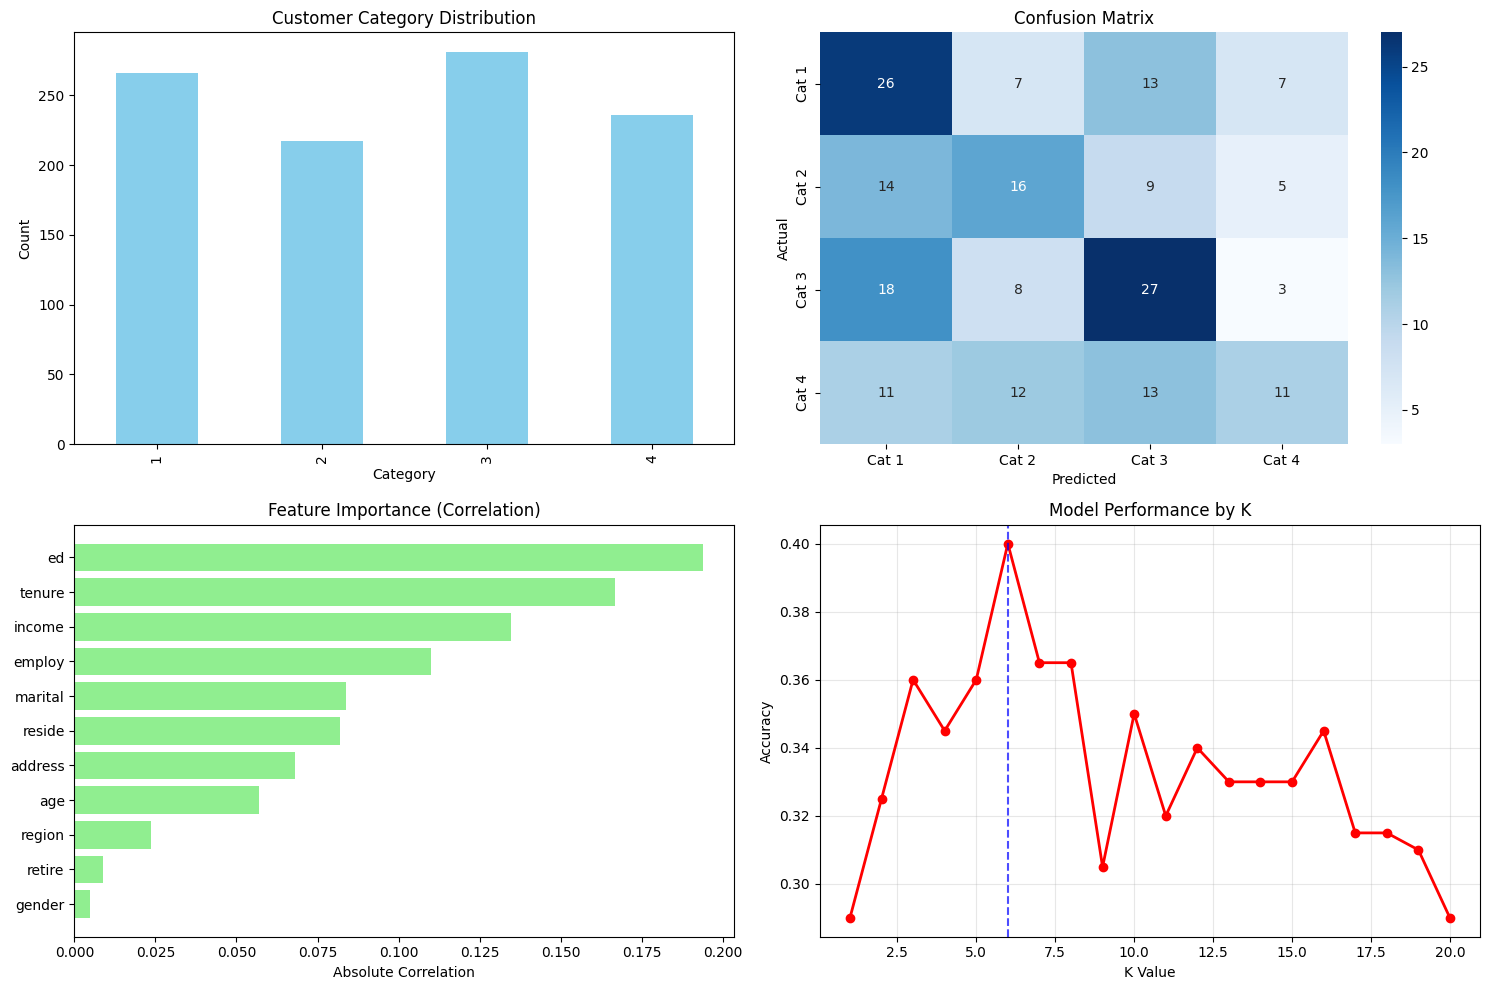


Per-Category Accuracy:
Category 1: 0.491 (49.1%)
Category 2: 0.364 (36.4%)
Category 3: 0.482 (48.2%)
Category 4: 0.234 (23.4%)


In [37]:
# Create visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# 1. Category distribution
df['custcat'].value_counts().sort_index().plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Customer Category Distribution')
ax1.set_xlabel('Category')
ax1.set_ylabel('Count')

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax2,
            xticklabels=[f'Cat {i}' for i in sorted(y.unique())],
            yticklabels=[f'Cat {i}' for i in sorted(y.unique())])
ax2.set_title('Confusion Matrix')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

# 3. Feature importance (correlation)
correlations = [abs(df[col].corr(df['custcat'])) for col in features]
feature_importance = pd.DataFrame({'Feature': features, 'Correlation': correlations})
feature_importance = feature_importance.sort_values('Correlation')
ax3.barh(feature_importance['Feature'], feature_importance['Correlation'], color='lightgreen')
ax3.set_title('Feature Importance (Correlation)')
ax3.set_xlabel('Absolute Correlation')

# 4. K-value performance
ax4.plot(k_range, accuracies, 'ro-', linewidth=2)
ax4.axvline(x=optimal_k, color='blue', linestyle='--', alpha=0.7)
ax4.set_xlabel('K Value')
ax4.set_ylabel('Accuracy')
ax4.set_title('Model Performance by K')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Per-category accuracy
print("\nPer-Category Accuracy:")
for i, cat in enumerate(sorted(y.unique())):
    cat_acc = cm[i, i] / cm[i, :].sum()
    print(f"Category {cat}: {cat_acc:.3f} ({cat_acc*100:.1f}%)")

## Model Summary

In [39]:
print("=" * 60)
print("KNN CUSTOMER CLASSIFICATION SUMMARY")
print("=" * 60)
print(f"🎯 Final Accuracy: {final_accuracy:.4f} ({final_accuracy*100:.1f}%)")
print(f"🔧 Optimal K Value: {optimal_k}")
print(f"📊 Dataset: {len(df)} customers, {len(features)} features")
print(f"🏷️  Categories: {len(y.unique())} ({sorted(y.unique())})")

# Top features
top_features = feature_importance.sort_values('Correlation', ascending=False)['Feature'].head(3).tolist()
print(f"\n🔍 Top Features: {', '.join(top_features)}")



KNN CUSTOMER CLASSIFICATION SUMMARY
🎯 Final Accuracy: 0.4000 (40.0%)
🔧 Optimal K Value: 6
📊 Dataset: 1000 customers, 11 features
🏷️  Categories: 4 ([np.int64(1), np.int64(2), np.int64(3), np.int64(4)])

🔍 Top Features: ed, tenure, income
